In [9]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from util.experiment import Experiment, load_experiments
from util.plotting import plot_label_clusters
import matplotlib.pyplot as plt

In [21]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (valid_images, valid_labels) = fashion_mnist.load_data()
train_images = np.expand_dims(train_images, -1).astype("float32") / 255.0

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [112]:
experiments = load_experiments(with_params={"latent_dim": 3, "beta": 2})
experiments.keys()

dict_keys(['09-05-2022_0437_allow-might-great-research'])

In [113]:
experiment = experiments['09-05-2022_0437_allow-might-great-research']['experiment']
model = experiment.load_model()

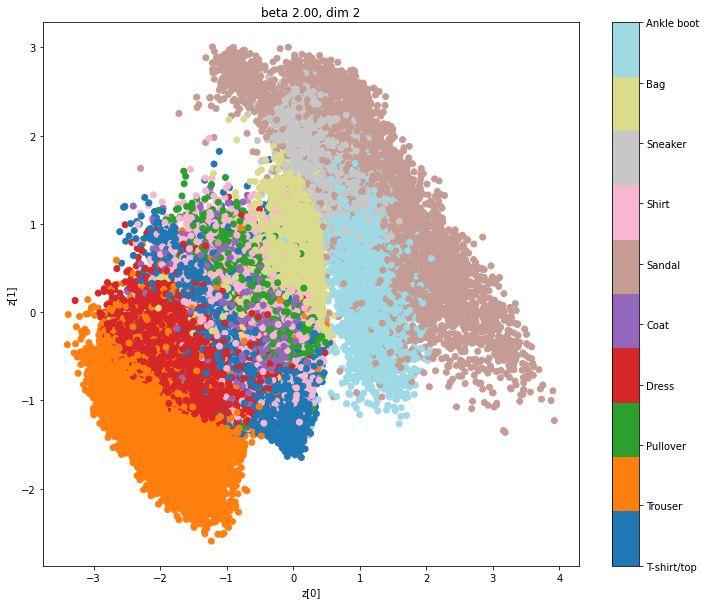

In [98]:
plot_label_clusters(model, train_images, train_labels, experiment.vis_dir,
                        title="beta %.2f, dim %d" % (experiment.params['beta'], experiment.params['latent_dim']), show=True)

Text(0.5, 1.0, 'Ankle boot')

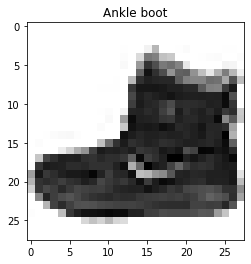

In [93]:
x = train_images[0]
y = train_labels[0]

plt.imshow(x, cmap=plt.cm.binary)
plt.title(class_names[y])

tf.Tensor([[ 0.7410085  -0.40142837  1.5923035 ]], shape=(1, 3), dtype=float32)


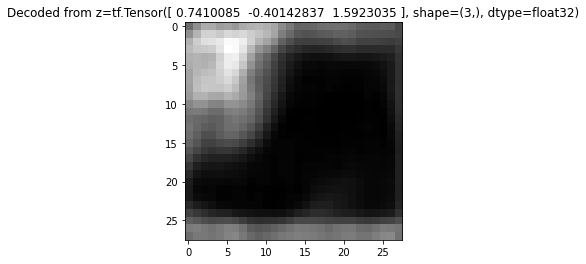

In [94]:
z_mean, z_log_var, z_sampled = model.encoder(tf.expand_dims(x, 0))
print(z_sampled)

x_decoded = model.decoder(z_sampled)
img = x_decoded[0].reshape(28, 28)
plt.title("Decoded from z=%s" % z_sampled[0])
plt.imshow(img, cmap=plt.cm.binary)

In [100]:
import seaborn as sb
import pandas as pd

In [140]:
_, _, z = model.encoder(train_images)
train_labels_decoded = [class_names[i] for i in train_labels]
labels_df = pd.DataFrame(train_labels_decoded, columns = ['class'])
z_df = pd.DataFrame(z, columns = ['1', '2', '3'])

labeled_z_df = pd.concat([labels_df, z_df], axis=1)
labeled_z_df

,class,1,2,3
0,Ankle boot,0.768677,-0.500369,1.560255
1,T-shirt/top,-1.031084,-1.423458,-0.162418
2,T-shirt/top,0.066880,0.499934,-1.291250
3,Dress,-0.332204,-0.024532,-0.828645
4,T-shirt/top,-1.466083,0.784036,-1.040577
...,...,...,...,...
59995,Sandal,1.824815,1.398021,0.114388
59996,Trouser,-1.635980,0.080363,-2.408278
59997,Dress,-1.169874,0.009932,-0.800439
59998,T-shirt/top,0.317843,-0.222270,-0.696674


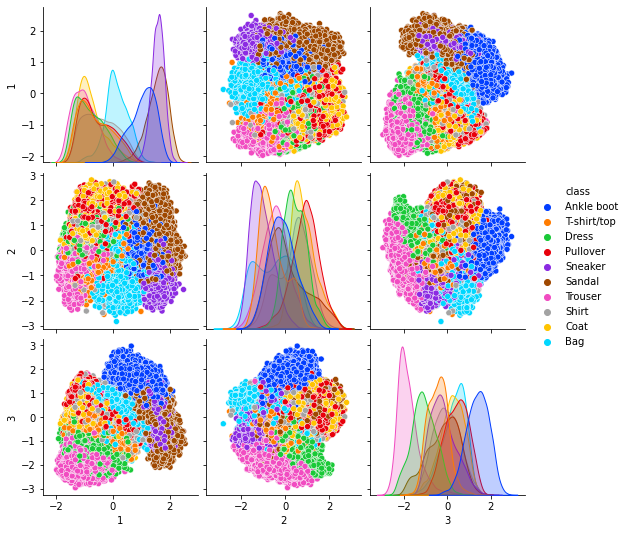

In [141]:
sb.pairplot(labeled_z_df, hue="class", palette=sb.color_palette("bright", 10))